In [8]:
# Messing with the Spotify API using spotipy
## target: 
## -get the currently playing song album art and display it in a jupyter notebook
## -volume control
## -play/pause control

#!pip3 install spotipy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import json

In [4]:
# get the client id and secret from the .env file

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, client_secret))

In [7]:
track = "coldplay yellow"
res = spotify.search(track, limit=1, type='track', market=None)
print(res)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=coldplay+yellow&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU'}, 'href': 'https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU', 'id': '4gzpq5DPGxSnKTe4SA8HAU', 'name': 'Coldplay', 'type': 'artist', 'uri': 'spotify:artist:4gzpq5DPGxSnKTe4SA8HAU'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI

In [21]:
print(json.dumps(res, sort_keys=True, indent=4))

{
    "tracks": {
        "href": "https://api.spotify.com/v1/search?query=coldplay+yellow&type=track&offset=0&limit=1",
        "items": [
            {
                "album": {
                    "album_type": "album",
                    "artists": [
                        {
                            "external_urls": {
                                "spotify": "https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU"
                            },
                            "href": "https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU",
                            "id": "4gzpq5DPGxSnKTe4SA8HAU",
                            "name": "Coldplay",
                            "type": "artist",
                            "uri": "spotify:artist:4gzpq5DPGxSnKTe4SA8HAU"
                        }
                    ],
                    "available_markets": [
                        "AR",
                        "AU",
                        "AT",
                        "BE",
 

In [36]:
# get the album art
from IPython.display import Image as Image_display
from IPython.core.display import HTML

album_art_url = res['tracks']['items'][0]['album']['images'][1]['url']
Image_display(url=album_art_url)

In [20]:
from spotipy.oauth2 import SpotifyOAuth

# personal keys from .env file
import os
from dotenv import load_dotenv
load_dotenv()
client_id = os.getenv("SPOTIPY_CLIENT_ID")
client_secret = os.getenv("SPOTIPY_CLIENT_SECRET")
redirect_uri = "https://localhost:8080"

# get the current song
sp = spotipy.Spotify(
    auth_manager=SpotifyOAuth(
        client_id=client_id,
        client_secret=client_secret,
        redirect_uri=redirect_uri,
        scope="user-read-currently-playing"))



In [127]:
# get the current song
current_song = sp.current_user_playing_track()
print(json.dumps(current_song, sort_keys=True, indent=4))

{
    "actions": {
        "disallows": {
            "resuming": true,
            "skipping_prev": true
        }
    },
    "context": {
        "external_urls": {
            "spotify": "https://open.spotify.com/album/0bh9TnPCRsV5oJYb5K8Ytp"
        },
        "href": "https://api.spotify.com/v1/albums/0bh9TnPCRsV5oJYb5K8Ytp",
        "type": "album",
        "uri": "spotify:album:0bh9TnPCRsV5oJYb5K8Ytp"
    },
    "currently_playing_type": "track",
    "is_playing": true,
    "item": {
        "album": {
            "album_type": "album",
            "artists": [
                {
                    "external_urls": {
                        "spotify": "https://open.spotify.com/artist/0hQBkU2vuMYXucmd89JUSw"
                    },
                    "href": "https://api.spotify.com/v1/artists/0hQBkU2vuMYXucmd89JUSw",
                    "id": "0hQBkU2vuMYXucmd89JUSw",
                    "name": "Tom Cardy",
                    "type": "artist",
                    "uri": "spoti

In [128]:
# get the current song's album art
album_art_url = current_song['item']['album']['images'][0]['url']
Image_display(url=album_art_url)

In [129]:
# Let's crop the image to a circle
#!pip3 install Pillow

from PIL import Image, ImageDraw
import requests
from io import BytesIO


def square_to_circle_with_transparent_corners(image):
    # Get the size of the image
    size = min(image.size)

    # Create a transparent mask image with an alpha channel
    mask = Image.new('L', (size, size), 0)
    draw = ImageDraw.Draw(mask)

    # Draw a white circle on the alpha channel
    draw.ellipse((0, 0, size, size), fill=255)

    # Apply the mask to the image
    image.putalpha(mask)

    return image

def get_img_from_url(url: str) -> Image:
    response = requests.get(url)

    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        return image
    

# get the current song's album art
album_cover = get_img_from_url(album_art_url)

# crop
circular_album_cover = square_to_circle_with_transparent_corners(album_cover)

In [130]:
circular_album_cover.save("circular_album_cover.png")

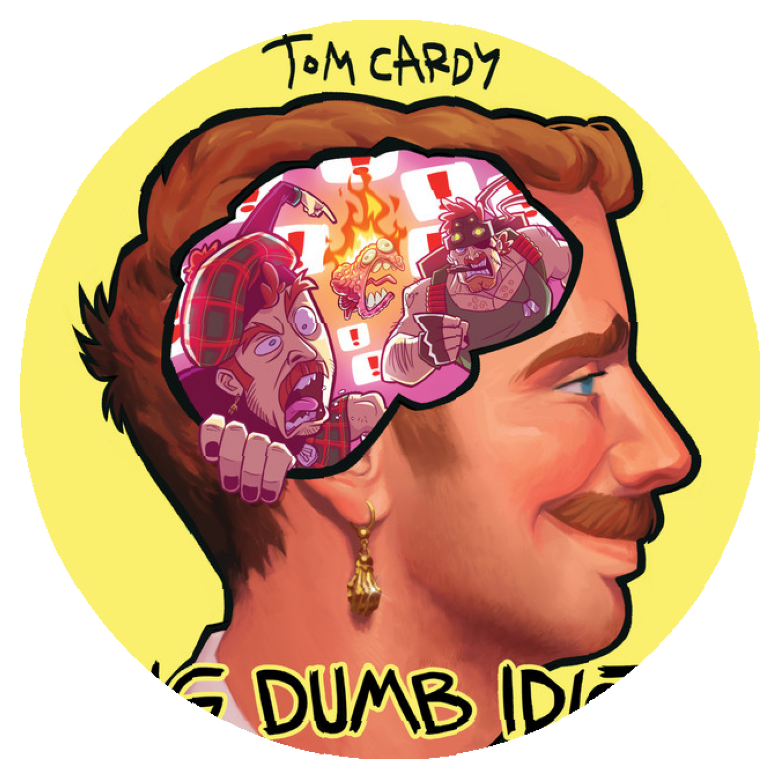

In [136]:
# rotate the image to simulate a turntable
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
img_plot = ax.imshow(circular_album_cover, animated=True)
plt.axis('off')

# function to update the plot for each frame
def update(frame):
    # rotate the image by a constant speed
    rotated_image = circular_album_cover.rotate(frame)
    img_plot.set_array(rotated_image)
    return img_plot,

# set up the animation
animation = FuncAnimation(fig, update, frames=np.arange(360, 0, -0.5),interval = 50,  blit = True)

from IPython.display import HTML
HTML(animation.to_html5_video())

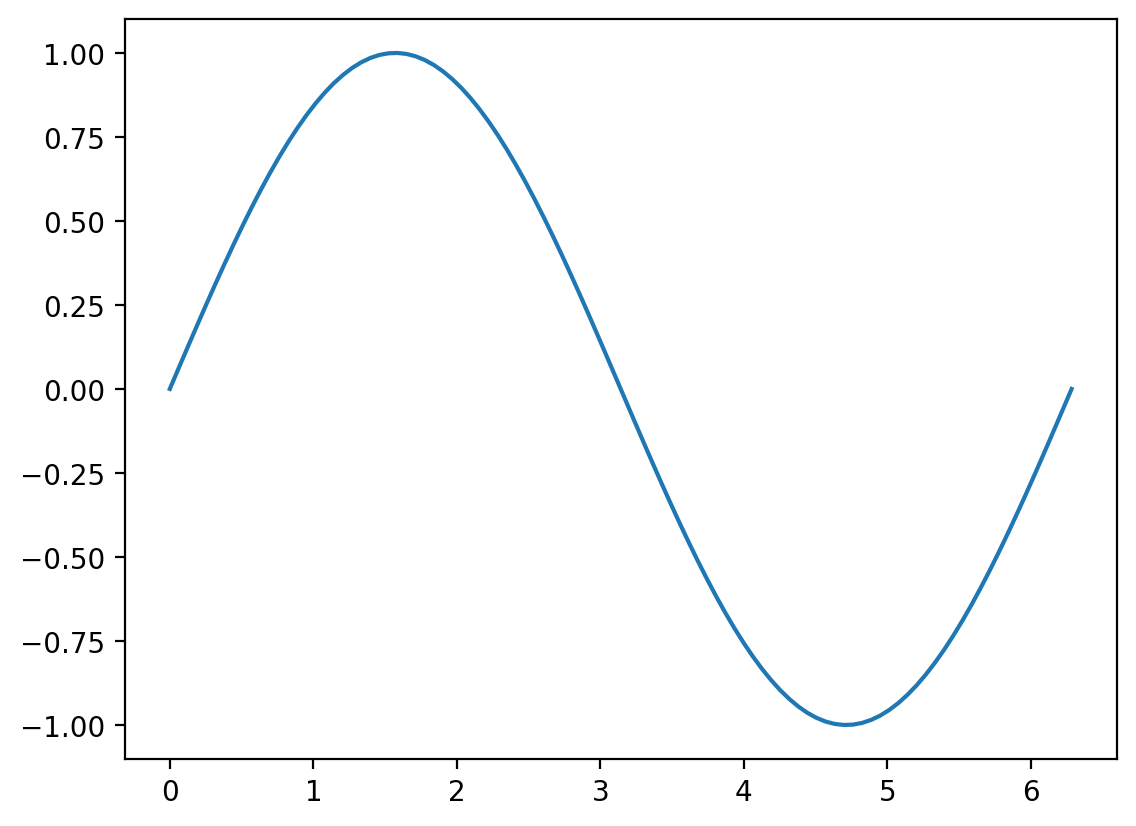

In [100]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

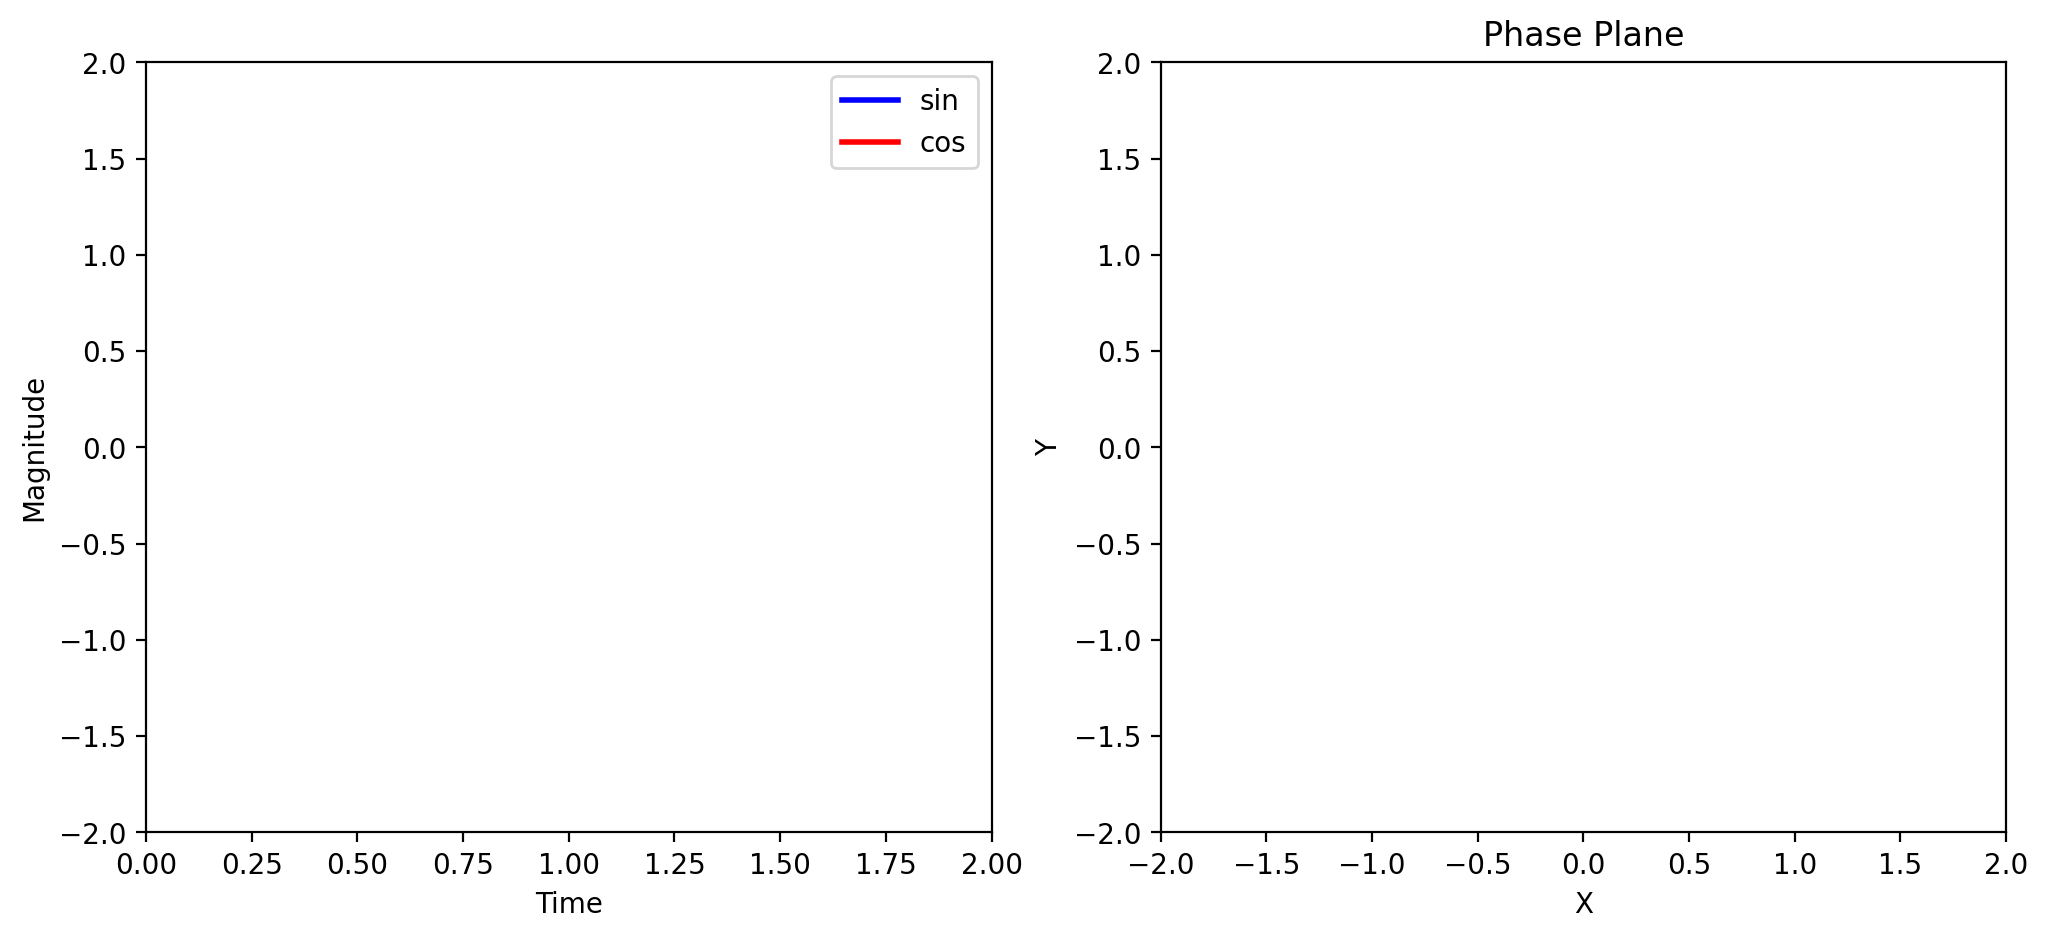

In [118]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);


In [119]:
# animation function. This is called sequentially
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

In [120]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

/tmp/ipykernel_123328/2572033083.py:9: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(y1[0],y2[0])


In [121]:
from IPython.display import HTML
HTML(anim.to_html5_video())

/tmp/ipykernel_123328/2572033083.py:9: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(y1[0],y2[0])


In [117]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [112]:
anim

RuntimeError: Requested MovieWriter (ffmpeg) not available